In [ ]:
#Exploratory Data Analysis for Classification using Pandas or Matplotlib. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset
iris_data = pd.read_csv('Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Dataset description
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Show basic statistics of the features
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Define features by excluding non-feature columns
features = iris_data.columns[1:-1]  # Exclude 'Id' and 'Species'

# Count and print the features
num_features = len(features)
print(f'There are {num_features} features: {list(features)}')

There are 4 features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [7]:
# How does the sepal length vary across different species of Iris?

# Grouping the data by species and calculating summary statistics for Sepal Length
sepal_length_by_species = iris_data.groupby('Species')['SepalLengthCm'].describe()
sepal_length_by_species

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


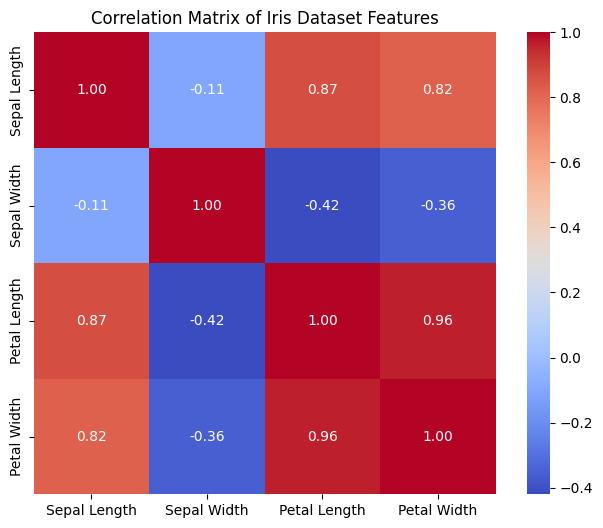

In [8]:
# Correlation of Iris Dataset Features

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris_data = pd.read_csv('Iris.csv')

# Calculate the correlation matrix
correlation_matrix = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True, 
            xticklabels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], 
            yticklabels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

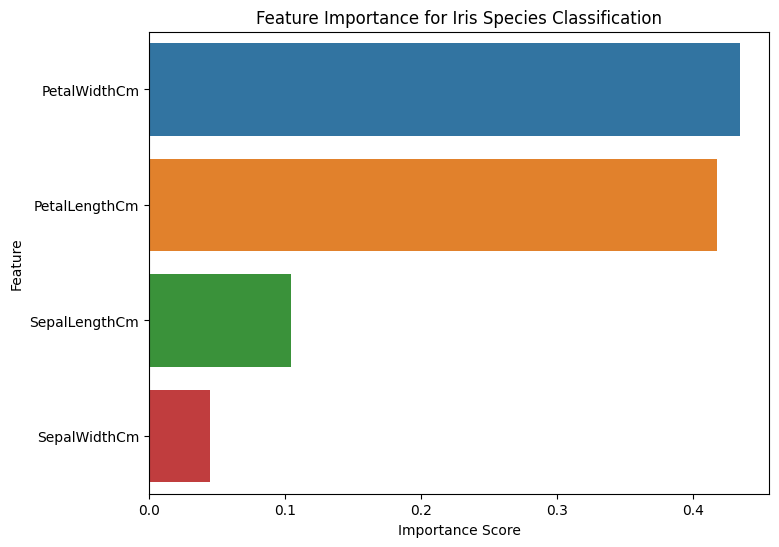

Feature Importance Scores:
         Feature  Importance
3   PetalWidthCm    0.433982
2  PetalLengthCm    0.417308
0  SepalLengthCm    0.104105
1   SepalWidthCm    0.044605


In [11]:
# Which feature (Sepal/Petal length/width) is the most important for differentiating between species?

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris_data = pd.read_csv('Iris.csv')

# Separate the features and target (species)
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = iris_data['Species']  # Target (species)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Iris Species Classification')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the feature importance for reference
print("Feature Importance Scores:")
print(importance_df)

In [12]:
# Get the class distribution of species
class_distribution = iris_data['Species'].value_counts()

# Display the class distribution
print("Class distribution of the different species:")
print(class_distribution)

Class distribution of the different species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


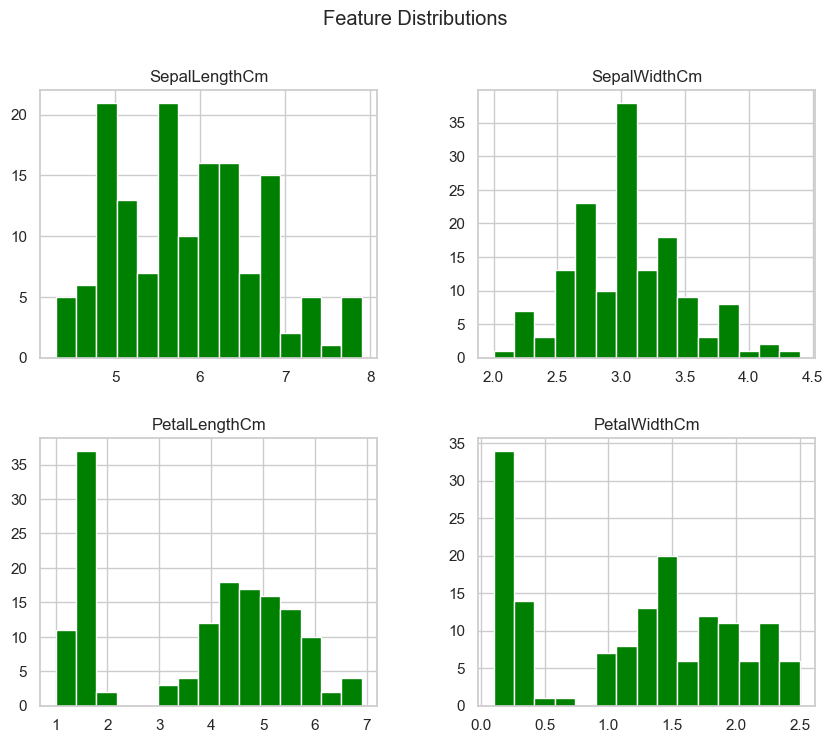

In [13]:
# Visualize Feature Distributions

import seaborn as sns

# Feature distributions
sns.set(style="whitegrid")
iris_data.hist(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
               bins=15, color='green', figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()

C:\Users\soumi_mu7w4\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


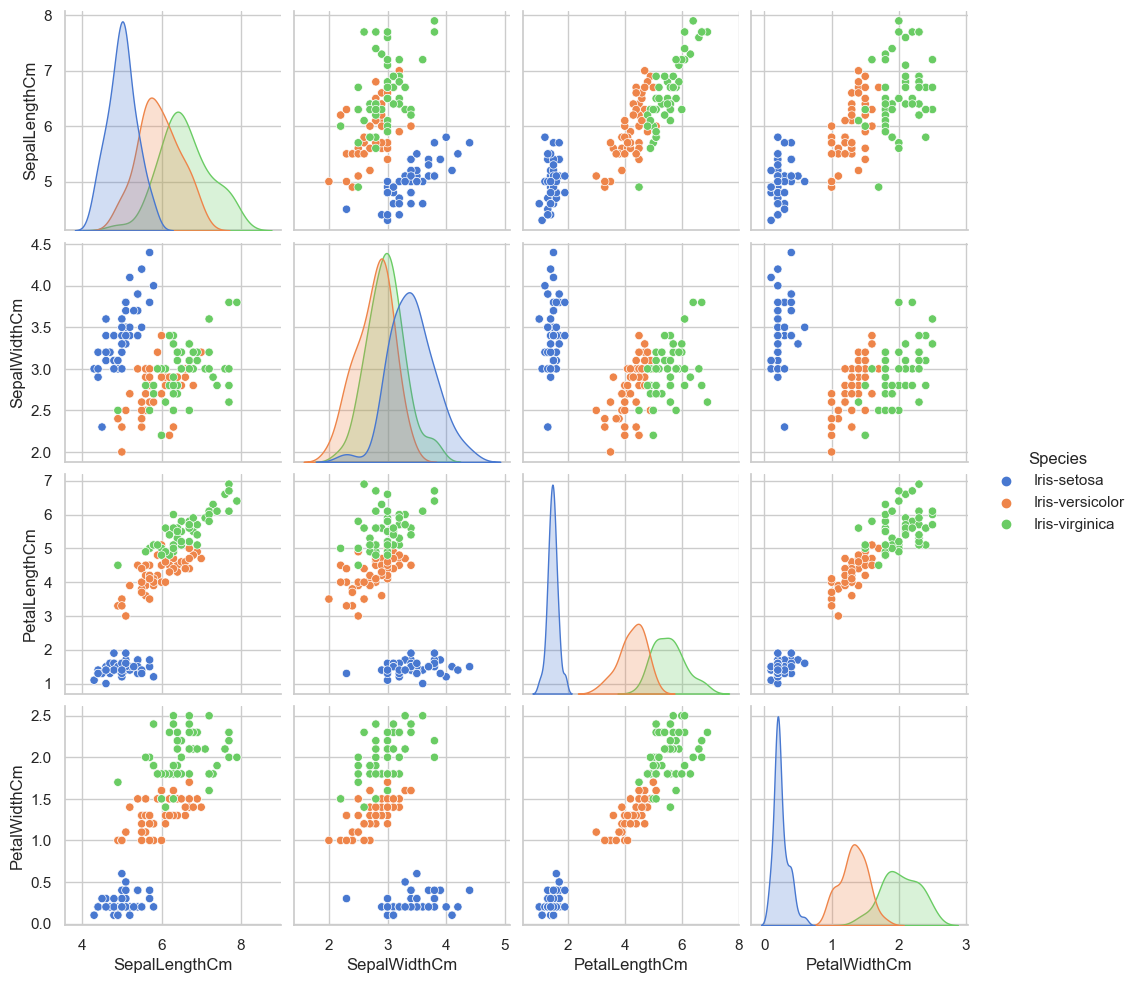

In [14]:
# Pairplot for Feature Relationships
sns.pairplot(
    iris_data, 
    vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  # Numeric features
    hue="Species", 
    palette="muted", 
    diag_kind="kde"
)
plt.show()